In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
df = pd.read_csv('../datasets/alzheimers_disease_data.csv')

In [5]:
df

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0              13.297218          6.327112     1.347214  ...   
1               4.542524          7.619885     0.518767  ...   
2              19.555085          7.844988     1.826335  ...   
3              12.209266          8.428001     7.435604  ...   
4              18.454356          6.310461     0.795498  ...   
...                  ...               ...          ...  ...   
2144            1.561126          4.049964     6.555306  ...   
2145           18.767261          1.360667     2.904662  ...   
2146            4.594670          9.886002     8.120025  ...   
2147            8.674505          6.354282     1.263427  ...   
2148            7.890703          6.570993     7.941404  ...   

      MemoryComplaints  BehavioralProblems       ADL  Confusion  \
0                    0                   0  1.725883          0   
1                    0                   0  2.592424          0   
2                    0                   0  7.119548          0   
3                    0                   1  6.481226          0   
4                    0                   0  0.014691          0   
...                ...                 ...       ...        ...   
2144                 0                   0  4.492838          1   
2145                 0                   1  9.204952          0   
2146                 0                   0  5.036334          0   
2147                 0                   0  3.785399          0   
2148                 0                   1  8.327563          0   

      Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0                  0                   0                          1   
1                  0                   0                          0   
2                  1                   0                          1   
3                  0                   0                          0   
4                  0                   1                          1   
...              ...                 ...                        ...   
2144               0                   0                          0   
2145               0                   0                          0   
2146               0                   0                          0   
2147               0                   0                          0   
2148               1                   0                          0   

      Forgetfulness  Diagnosis  DoctorInCharge  
0                 0          0       XXXConfid  
1                 1          0       XXXConfid  
2                 0          0       XXXConfid  
3                 0          0       XXXConfid  
4                 0          0       XXXConfid  
...             ...        ...             ...  
2144              0          1       XXXConfid  
2145              0          1       XXXConfid  
2146              0          1       XXXConfid  
2147              1          1       XXXConfid  
2148              1          0       XXXConfid  

[2149 rows x 35 columns]

In [7]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [11]:
df = df.drop(columns= ['PatientID', 'DoctorInCharge'])
df

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0      73       0          0               2  22.927749        0   
1      89       0          0               0  26.827681        0   
2      73       0          3               1  17.795882        0   
3      74       1          0               1  33.800817        1   
4      89       0          0               0  20.716974        0   
...   ...     ...        ...             ...        ...      ...   
2144   61       0          0               1  39.121757        0   
2145   75       0          0               2  17.857903        0   
2146   77       0          0               1  15.476479        0   
2147   78       1          3               1  15.299911        0   
2148   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0              13.297218          6.327112     1.347214      9.025679  ...   
1               4.542524          7.619885     0.518767      7.151293  ...   
2              19.555085          7.844988     1.826335      9.673574  ...   
3              12.209266          8.428001     7.435604      8.392554  ...   
4              18.454356          6.310461     0.795498      5.597238  ...   
...                  ...               ...          ...           ...  ...   
2144            1.561126          4.049964     6.555306      7.535540  ...   
2145           18.767261          1.360667     2.904662      8.555256  ...   
2146            4.594670          9.886002     8.120025      5.769464  ...   
2147            8.674505          6.354282     1.263427      8.322874  ...   
2148            7.890703          6.570993     7.941404      9.878711  ...   

      FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0                 6.518877                 0                   0  1.725883   
1                 7.118696                 0                   0  2.592424   
2                 5.895077                 0                   0  7.119548   
3                 8.965106                 0                   1  6.481226   
4                 6.045039                 0                   0  0.014691   
...                    ...               ...                 ...       ...   
2144              0.238667                 0                   0  4.492838   
2145              8.687480                 0                   1  9.204952   
2146              1.972137                 0                   0  5.036334   
2147              5.173891                 0                   0  3.785399   
2148              6.307543                 0                   1  8.327563   

      Confusion  Disorientation  PersonalityChanges  \
0             0               0                   0   
1             0               0                   0   
2             0               1                   0   
3             0               0                   0   
4             0               0                   1   
...         ...             ...                 ...   
2144          1               0                   0   
2145          0               0                   0   
2146          0               0                   0   
2147          0               0                   0   
2148          0               1                   0   

      DifficultyCompletingTasks  Forgetfulness  Diagnosis  
0                             1              0          0  
1                             0              1          0  
2                             1              0          0  
3                             0              0          0  
4                             1              0          0  
...                         ...            ...        ...  
2144                          0              0          1  
2145                          0              0          1  
2146                          0              0          1  
2147                          0              1        

In [13]:
df.isnull().sum().sort_values(ascending=False)

Age                          0
DiastolicBP                  0
Forgetfulness                0
DifficultyCompletingTasks    0
PersonalityChanges           0
Disorientation               0
Confusion                    0
ADL                          0
BehavioralProblems           0
MemoryComplaints             0
FunctionalAssessment         0
MMSE                         0
CholesterolTriglycerides     0
CholesterolHDL               0
CholesterolLDL               0
CholesterolTotal             0
SystolicBP                   0
Gender                       0
Hypertension                 0
HeadInjury                   0
Depression                   0
Diabetes                     0
CardiovascularDisease        0
FamilyHistoryAlzheimers      0
SleepQuality                 0
DietQuality                  0
PhysicalActivity             0
AlcoholConsumption           0
Smoking                      0
BMI                          0
EducationLevel               0
Ethnicity                    0
Diagnosi

In [15]:
categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 
                    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
                    'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation',
                    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [17]:
disc = KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy = 'quantile')

In [19]:
df['Age'] = disc.fit_transform(df[['Age']])

In [21]:
X = df.drop(columns = ['Diagnosis'])

In [23]:
y = df['Diagnosis']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

In [29]:
y_pred= model.predict(X_test)

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7604651162790698
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       278
           1       0.72      0.53      0.61       152

    accuracy                           0.76       430
   macro avg       0.75      0.71      0.72       430
weighted avg       0.76      0.76      0.75       430



In [33]:
probs = model.predict_proba(X_test)
print(probs[:5])  # First 5 predicted probabilities

[[0.74256909 0.25743091]
 [0.93214649 0.06785351]
 [0.06286822 0.93713178]
 [0.58851883 0.41148117]
 [0.09798142 0.90201858]]


In [35]:
importances = mutual_info_classif(X, y, discrete_features=True)

C:\Users\angel\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\ang

In [37]:
importance_table = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [39]:
print(importance_table)

                      Feature    Importance
9                SleepQuality  6.496786e-01
21   CholesterolTriglycerides  6.496786e-01
4                         BMI  6.496786e-01
18           CholesterolTotal  6.496786e-01
22                       MMSE  6.496786e-01
19             CholesterolLDL  6.496786e-01
20             CholesterolHDL  6.496786e-01
26                        ADL  6.496786e-01
6          AlcoholConsumption  6.496786e-01
7            PhysicalActivity  6.496786e-01
8                 DietQuality  6.496786e-01
23       FunctionalAssessment  6.496786e-01
24           MemoryComplaints  4.525652e-02
25         BehavioralProblems  2.404733e-02
16                 SystolicBP  1.735228e-02
17                DiastolicBP  1.086688e-02
2                   Ethnicity  1.465159e-03
3              EducationLevel  1.034077e-03
0                         Age  7.505300e-04
15               Hypertension  6.074235e-04
10    FamilyHistoryAlzheimers  5.456632e-04
12                   Diabetes  5

In [41]:
top_features = [
    'SleepQuality',
    'CholesterolTriglycerides',
    'BMI',
    'CholesterolTotal',
    'MMSE',
    'CholesterolLDL',
    'CholesterolHDL',
    'ADL',
    'AlcoholConsumption',
    'PhysicalActivity'
]

In [43]:
X_n = df[top_features]
y_n = df['Diagnosis']

In [45]:
X_ntrain, X_testn, y_trainn, y_testn = train_test_split(X_n, y_n, test_size = 0.2, random_state = 42, stratify = y)

In [47]:
nb_model = CategoricalNB()
nb_model.fit(X_ntrain, y_trainn)
y_pred_nb = nb_model.predict(X_testn)

In [49]:
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_ntrain, y_trainn)
y_pred_lr = lr_model.predict(X_testn)

In [51]:
print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_testn, y_pred_nb))
print(classification_report(y_testn, y_pred_nb))

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_testn, y_pred_lr))
print(classification_report(y_testn, y_pred_lr))

Naive Bayes Performance:
Accuracy: 0.6372093023255814
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       278
           1       0.48      0.35      0.40       152

    accuracy                           0.64       430
   macro avg       0.59      0.57      0.57       430
weighted avg       0.62      0.64      0.62       430

Logistic Regression Performance:
Accuracy: 0.713953488372093
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       278
           1       0.62      0.49      0.55       152

    accuracy                           0.71       430
   macro avg       0.69      0.66      0.67       430
weighted avg       0.70      0.71      0.70       430



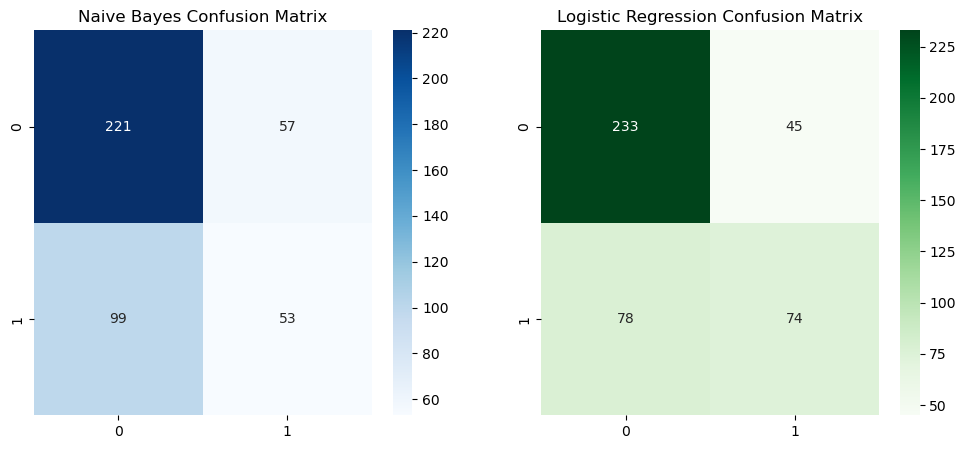

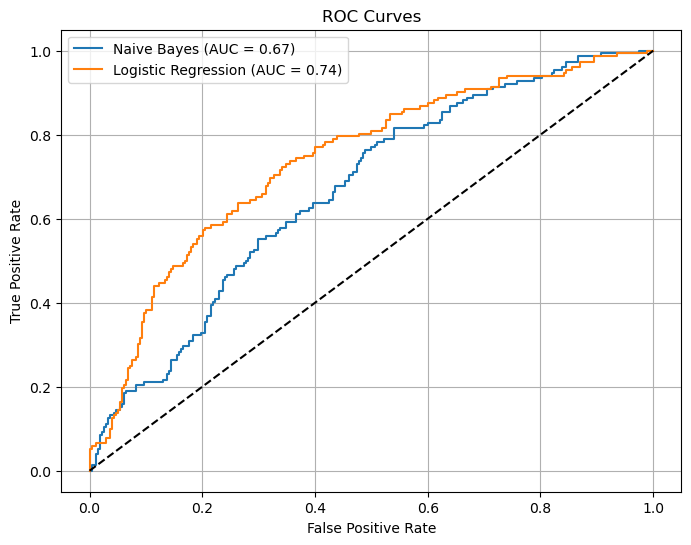

In [53]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_testn, y_pred_nb), annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Naive Bayes Confusion Matrix')

sns.heatmap(confusion_matrix(y_testn, y_pred_lr), annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title('Logistic Regression Confusion Matrix')

plt.show()

# ROC Curves
y_proba_nb = nb_model.predict_proba(X_testn)[:, 1]
y_proba_lr = lr_model.predict_proba(X_testn)[:, 1]

fpr_nb, tpr_nb, _ = roc_curve(y_testn, y_proba_nb)
fpr_lr, tpr_lr, _ = roc_curve(y_testn, y_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc(fpr_nb, tpr_nb):.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid()
plt.show()

# We will try to modify Logistic Regression parameter
Search for Best C Value using Cross-Validation

In [56]:
log_reg = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

In [58]:
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_ntrain, y_trainn)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [59]:
print("Best C value:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best C value: {'C': 0.01}
Best cross-validation score: 0.7242626618753814


In [60]:
best_regression = grid_search.best_estimator_

In [64]:
y_pred_best_lr = best_regression.predict(X_testn)

In [66]:
print("Tuned Logistic Regression Performance")
print("Accuracy", accuracy_score(y_testn, y_pred_best_lr))
print(classification_report(y_testn, y_pred_best_lr))

Tuned Logistic Regression Performance
Accuracy 0.7232558139534884
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       278
           1       0.65      0.48      0.55       152

    accuracy                           0.72       430
   macro avg       0.70      0.67      0.68       430
weighted avg       0.71      0.72      0.71       430



# Ranfom Forest Classifier

In [69]:
rf_model = RandomForestClassifier(
    n_estimators=100,     # 100 trees
    max_depth=None,       # Allow trees to grow fully
    random_state=42
)

In [71]:
rf_model.fit(X_ntrain, y_trainn)

RandomForestClassifier(random_state=42)

In [73]:
y_pred_rf = rf_model.predict(X_testn)
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_testn, y_pred_rf))
print(classification_report(y_testn, y_pred_rf))

Random Forest Performance:
Accuracy: 0.7441860465116279
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       278
           1       0.65      0.60      0.62       152

    accuracy                           0.74       430
   macro avg       0.72      0.71      0.71       430
weighted avg       0.74      0.74      0.74       430



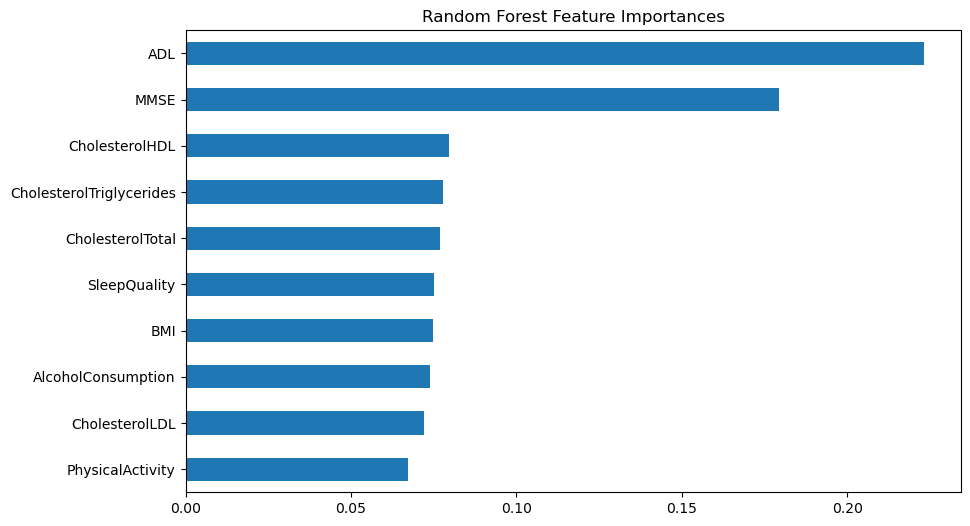

In [75]:
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=X_ntrain.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.show()

# Tune Random Forest
## We will tune:
- n_estimators = number of trees
- max_depth = maximum depth of each tree
- min_samples_split = minimum samples to split a node

In [78]:
rf_tune = RandomForestClassifier(random_state = 42)

In [80]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [82]:
grid_search_rf = GridSearchCV(
    rf_tune, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search_rf.fit(X_ntrain, y_trainn)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [83]:
print("Best Random Forest Params:", grid_search_rf.best_params_)
print("Best Cross-Validation Score:", grid_search_rf.best_score_)

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validation Score: 0.7550952606956404


In [84]:
best_rf = grid_search_rf.best_estimator_

ensemble_model = VotingClassifier(
    estimators = [
        ('rf', best_rf),
        ('lr',best_regression)
    ],
    voting = 'soft'
)
ensemble_model.fit(X_ntrain, y_trainn)
y_pred_ensemble = ensemble_model.predict(X_testn)
print("Ensemble Model Performance:")
print("Accuracy:", accuracy_score(y_testn, y_pred_ensemble))
print(classification_report(y_testn, y_pred_ensemble))

Ensemble Model Performance:
Accuracy: 0.7372093023255814
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       278
           1       0.65      0.57      0.60       152

    accuracy                           0.74       430
   macro avg       0.71      0.70      0.70       430
weighted avg       0.73      0.74      0.73       430



In [88]:
joblib.dump(rf_model, 'alzheimers_model.pkl')

['alzheimers_model.pkl']